# "Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation" in Graphlab Create

相关背景，请参看[情景描述](https://github.com/crazyacking/ted-in-spark/blob/master/juputer/Damage%20Propagation%20Modeling%20for%20Aircraft%20Engine%20Run-to-Failure%20Simulation.ipynb)


### 初始化Graphlab

In [5]:
import graphlab as gl

### 导入数据

将所有NASA提供的原始数据文件导入到GraphLab提供的数据结构`SFrames`中。

In [6]:
train_data=gl.SFrame.read_csv('../data/train_FD001.txt.gz',delimiter=' ' ,header=False)
train_data.append(gl.SFrame.read_csv('../data/train_FD002.txt.gz',delimiter=' ' ,header=False))
train_data.append(gl.SFrame.read_csv('../data/train_FD003.txt.gz',delimiter=' ' ,header=False))
train_data.append(gl.SFrame.read_csv('../data/train_FD004.txt.gz',delimiter=' ' ,header=False))
                  
test_data=gl.SFrame.read_csv('../data/test_FD001.txt.gz',delimiter=' ' ,header=False)
test_data.append(gl.SFrame.read_csv('../data/test_FD002.txt.gz',delimiter=' ' ,header=False))
test_data.append(gl.SFrame.read_csv('../data/test_FD003.txt.gz',delimiter=' ' ,header=False))
test_data.append(gl.SFrame.read_csv('../data/test_FD004.txt.gz',delimiter=' ' ,header=False))

Truth=gl.SFrame.read_csv('../data/RUL_FD001.txt.gz',delimiter=' ' ,header=False)
Truth.append(gl.SFrame.read_csv('../data/RUL_FD002.txt.gz',delimiter=' ' ,header=False))
Truth.append(gl.SFrame.read_csv('../data/RUL_FD003.txt.gz',delimiter=' ' ,header=False))
Truth.append(gl.SFrame.read_csv('../data/RUL_FD004.txt.gz',delimiter=' ' ,header=False))

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD001.txt.gz

Parsing completed. Parsed 100 lines in 0.517909 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD001.txt.gz

Parsing completed. Parsed 20631 lines in 0.167482 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD002.txt.gz

Parsing completed. Parsed 100 lines in 1.1496 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD002.txt.gz

Parsing completed. Parsed 53759 lines in 0.419048 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD003.txt.gz

Parsing completed. Parsed 100 lines in 0.183567 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD003.txt.gz

Parsing completed. Parsed 24720 lines in 0.189238 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD004.txt.gz

Parsing completed. Parsed 100 lines in 0.330925 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD004.txt.gz

Parsing completed. Parsed 61249 lines in 0.473214 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD001.txt.gz

Parsing completed. Parsed 100 lines in 0.101855 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD001.txt.gz

Parsing completed. Parsed 13096 lines in 0.107328 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD002.txt.gz

Parsing completed. Parsed 100 lines in 0.211844 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD002.txt.gz

Parsing completed. Parsed 33991 lines in 0.280589 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD003.txt.gz

Parsing completed. Parsed 100 lines in 0.115602 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD003.txt.gz

Parsing completed. Parsed 16596 lines in 0.144367 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD004.txt.gz

Parsing completed. Parsed 100 lines in 0.235327 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD004.txt.gz

Parsing completed. Parsed 41214 lines in 0.313428 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD001.txt.gz

Parsing completed. Parsed 100 lines in 0.038343 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD001.txt.gz

Parsing completed. Parsed 100 lines in 0.037928 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD002.txt.gz

Parsing completed. Parsed 100 lines in 0.03361 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD002.txt.gz

Parsing completed. Parsed 259 lines in 0.035321 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD003.txt.gz

Parsing completed. Parsed 100 lines in 0.036367 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD003.txt.gz

Parsing completed. Parsed 100 lines in 0.041905 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD004.txt.gz

Parsing completed. Parsed 100 lines in 0.036298 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD004.txt.gz

Parsing completed. Parsed 248 lines in 0.034782 secs.

X1
112
98
69
82
91
93
91
95
111
96


### 重命名SFrames中的列

导入到SFrames中的原始数据并没有列名，需要我们手动重命名列名(= define the schema)。

SFrame中列名使用python内部提供的数据结构dictionairy存储，可以调用the SFrame.rename()方法，使用 'Old name':'New name' 的方式来重命名列名。


In [7]:
#Rename the only column in the Truth file for test data
Truth.rename({'X1':'RUL_maxcycle'})

#Build the python dictionary
col_renaming_dict={'X1':'id' , 'X2':'cycle'}  
col_renaming_dict.update({'X3':'setting1' , 'X4':'setting2', 'X5':'setting3'})
for i in xrange(1,22):
    #Generates names for columns s1, s2,..., s21
    col_renaming_dict.update({'X'+str(i+5) : 's'+str(i)}) 

#Rename the column in test and data
train_data.rename(col_renaming_dict)
test_data.rename(col_renaming_dict)

#View the train data
train_data.head()

id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.7,1400.6,14.62,21.61,554.36,2388.06
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04
1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.2,14.62,21.61,554.26,2388.08
1,4,0.0007,0.0,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11
1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.0,2388.06
1,6,-0.0043,-0.0001,100.0,518.67,642.1,1584.47,1398.37,14.62,21.61,554.67,2388.02
1,7,0.001,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,21.61,554.34,2388.02
1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,21.61,553.85,2388.0
1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.8,14.62,21.61,553.69,2388.05
1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,21.61,553.59,2388.05


In [8]:
#View the test data
test_data.head()

id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8
1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.9,2388.04
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01
1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05
1,4,0.0042,0.0,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03
1,5,0.0014,0.0,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01
1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,21.61,554.22,2388.0
1,7,-0.0,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,21.61,553.89,2388.05
1,8,0.0006,-0.0,100.0,518.67,642.54,1580.89,1400.89,14.62,21.61,553.59,2388.05
1,9,-0.0036,0.0,100.0,518.67,641.88,1593.29,1412.28,14.62,21.61,554.49,2388.06
1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,21.61,554.28,2388.04


### 使用训练集计算剩余使用寿命(RUL)

在训练集中，引擎将一直运行直到发生故障，这和每个引擎ID的最后一个循环相对应。

为了计算每个引擎的剩余使用寿命(RUL)和故障周期，我们需要：
- 找到每个引擎的最后一次循环（即：具有最大索引的循环）
- 对于每一个循环，计算RUL=最后的循环-当前循环(RUL = last cycle - current cycle)

In [9]:
# 寻找最后一次循环
fault_cycle=train_data.groupby('id',operations={'Fault_cycle' : gl.aggregate.MAX('cycle')}) 
# 作为新的一列加入到SFrame中
train_data=train_data.join(fault_cycle)
# 计算RUL
train_data['RUL']=train_data.apply(lambda x: x['Fault_cycle']-x['cycle'])
#train_data.remove_column('Fault_cycle')  #Optionally remove the column since it won't be needed further
train_data.head() #View the data



id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.7,1400.6,14.62,21.61,554.36,2388.06
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04
1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.2,14.62,21.61,554.26,2388.08
1,4,0.0007,0.0,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11
1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.0,2388.06
1,6,-0.0043,-0.0001,100.0,518.67,642.1,1584.47,1398.37,14.62,21.61,554.67,2388.02
1,7,0.001,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,21.61,554.34,2388.02
1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,21.61,553.85,2388.0
1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.8,14.62,21.61,553.69,2388.05
1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,21.61,553.59,2388.05


### 将测试集的格式与训练集统一

对于测试集数据，实验后可以确定，每个引擎的剩余使用寿命(RUL)应在测试集中每个引擎最后一次运行之后。

我们可以转换这些信息，以便在每一个循环中获取每个引擎的剩余使用寿命(RUL)列。


In [10]:
#Re-create the engine ID for the data from the "Truth" file. 
Truth['id']=range(1,len(Truth)+1)
#Add this data as a new column to the SFrame
test_data=test_data.join(Truth)

#Find the last test cycle for each engine
last_test_cycle=test_data.groupby('id',operations={'Last_test_cycle' : gl.aggregate.MAX('cycle')})
#Add this as a new column to the SFrame
test_data=test_data.join(last_test_cycle)

#The RUL at each cycle is the RUL at the end of the test + how many cycles before end of the test.
test_data['RUL']=test_data.apply(lambda x: x['RUL_maxcycle']+(x['Last_test_cycle']-x['cycle']))

#Optionally remove unnessary columns                                
#test_data.remove_column('RUL_maxcycle')
#test_data.remove_column('Last_test_cycle')

#View the data 
test_data.head()


id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8
1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.9,2388.04
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01
1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05
1,4,0.0042,0.0,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03
1,5,0.0014,0.0,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01
1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,21.61,554.22,2388.0
1,7,-0.0,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,21.61,553.89,2388.05
1,8,0.0006,-0.0,100.0,518.67,642.54,1580.89,1400.89,14.62,21.61,553.59,2388.05
1,9,-0.0036,0.0,100.0,518.67,641.88,1593.29,1412.28,14.62,21.61,554.49,2388.06
1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,21.61,554.28,2388.04


### 生成标签

现在我们基于剩余使用寿命(RUL)为这些数据创建两个标签：

- Label 1：如果RUL>30(距离故障时刻还很远)，值为0；否则为1(靠近故障时刻)。

- Label 2：和1类似，但多增加了一个维度：当RUL\<15时(非常靠近故障时刻)，值为2。

我们将这两个标签运用到训练集和测试集。

In [11]:
w1=30
w0=15

train_data['label1']=train_data.apply(lambda x: 0 if x['RUL']>w1 else 1)
train_data['label2']=train_data.apply(lambda x: x['label1'] if x['RUL']>w0 else 2)
test_data['label1']=test_data.apply(lambda x: 0 if x['RUL']>w1 else 1)
test_data['label2']=test_data.apply(lambda x: x['label1'] if x['RUL']>w0 else 2)   


### 特征工程

在这一步中，我们将计算最近5个周期内每个变量的`平均值`和`标准差(std)`，并将这两个值作为我们机器学习算法的补充特征。

In [22]:
def build_features(data):
    #Defining the Windows onto which we perform the mean and std.
    # 定义我们需要计算平均值和标准差的滑窗大小
    # 这里，cycle i的平均值和标准差是使用cycle i-4 to i来计算
    windowsStart = -4
    windowsStop = 0

    # 定义我们需要计算平均值和标准差的列
    cols=list()
    for i in xrange(1,22):
        cols.append('s'+str(i)) 
    col_id_cycle=cols
    col_id_cycle.append('id')
    col_id_cycle.append('cycle')
    
    
    # engine ID列表
    IDs=data['id'].unique()
    
    # 用一个临时的SFrame来存储中间数据
    CollectFrame=gl.SFrame()
    
    for IDx in IDs:  #For each engine
        tmpFrame=data[data['id']==IDx][col_id_cycle].sort('cycle', ascending = True)  #Select all the cycles and sort by cycle ID
        for col in cols:  #Calculate the mean and std for every column of interest
            tmpFrame['mean_'+col]=tmpFrame[col].rolling_mean(windowsStart,windowsStop)
            tmpFrame['stdv_'+col]=tmpFrame[col].rolling_stdv(windowsStart,windowsStop)   
        CollectFrame=CollectFrame.append(tmpFrame)  #Add the new features to the SFrame
    data=data.join(CollectFrame) #When everything has been computed for all engine IDs, join back to the original SFrame. 
    #NB: there might be a more elegant way of doing the above - come back later!
    
    
    #The mean and std, are not defined for the first 4 cycles of each engine. 
    for col in cols:
        #These lines fill the missing data with some reasonable values. 
        data['mean_'+col]=data[{col , 'mean_'+col , 'stdv_'+col}].apply(lambda x :  x[col] if x['mean_'+col] is None  else  x['mean_'+col])    
        data['stdv_'+col]=data[{col , 'mean_'+col , 'stdv_'+col}].apply(lambda x :  0 if x['stdv_'+col] is None  else  x['stdv_'+col])

    return data

In [23]:
# 为训练集和测试集创建特征(可能需要花费一些时间)
train_data=build_features(train_data)
test_data=build_features(test_data)

In [24]:
#View the data in 2 different ways
train_data.show()
train_data.head()

Canvas is accessible via web browser at the URL: http://localhost:43409/index.html
Opening Canvas in default web browser.


id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8
49,1,0.0019,0.0002,100.0,518.67,642.31,1595.57,1401.2,14.62,21.61,553.33,2388.12
49,2,-0.0023,0.0001,100.0,518.67,642.37,1583.9,1400.51,14.62,21.61,553.25,2388.1
49,3,-0.0014,0.0002,100.0,518.67,643.07,1588.82,1408.52,14.62,21.61,553.36,2388.14
49,4,0.0014,-0.0004,100.0,518.67,642.74,1589.17,1410.89,14.62,21.61,553.59,2388.13
49,5,-0.0018,0.0004,100.0,518.67,642.67,1597.75,1406.88,14.62,21.61,553.22,2388.06
49,6,-0.0052,-0.0003,100.0,518.67,642.48,1591.5,1406.92,14.62,21.61,553.69,2388.14
49,7,0.0024,-0.0002,100.0,518.67,642.79,1586.42,1403.15,14.62,21.61,553.81,2388.04
49,8,0.0032,0.0002,100.0,518.67,642.84,1583.72,1402.64,14.62,21.61,553.39,2388.14
49,9,-0.001,0.0001,100.0,518.67,642.54,1589.21,1408.57,14.62,21.61,553.43,2388.13
49,10,0.0001,0.0001,100.0,518.67,642.1,1582.51,1402.66,14.62,21.61,553.28,2388.08


### Create a list of features that will be used for training
### 生成一个特征列表用于后续的训练

In [26]:
features_to_train=list()
features_to_train.append('cycle')
for i in xrange(1,3):
    features_to_train.append( 'setting'+str(i) )
for i in xrange(1,22):
    features_to_train.append('s'+str(i)) 
    features_to_train.append('mean_s'+str(i))
    features_to_train.append('stdv_s'+str(i))

### 训练逻辑分类器

使用上面生成的特征列表，训练一个逻辑分类器，从而用来预测`label 2`。

In [27]:
model=gl.logistic_classifier.create(train_data,'label2',features_to_train,class_weights='auto')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 's1', 'mean_s1', 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

### 评估模型

使用Graphab内置评估工具来评估模型（训练集和测试集的模型）

In [28]:
model.evaluate(train_data)

--------------------------------------------------------

Number of examples          : 19645

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 1.371480     | 0.863528          | 0.846856            |

| 2         | 3        | 1.585869     | 0.823212          | 0.817444            |

| 3         | 4        | 1.771334     | 0.814253          | 0.811359            |

| 4         | 5        | 1.960822     | 0.813388          | 0.812373            |

| 5         | 6        | 2.158261     | 0.813235          | 0.812373            |

| 6         | 7        | 2.365005     | 0.813235          | 0.812373            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

{'accuracy': 0.8131937375793709,
 'auc': 0.9286331490424468,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 9
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      2       |        1        |  159  |
 |      1       |        1        |  988  |
 |      1       |        2        |  331  |
 |      1       |        0        |  181  |
 |      0       |        0        | 14358 |
 |      2       |        2        |  1431 |
 |      0       |        1        |  3133 |
 |      2       |        0        |   10  |
 |      0       |        2        |   40  |
 +--------------+-----------------+-------+
 [9 rows x 3 columns],
 'f1_score': 0.6927585034959333,
 'log_loss': 0.4715380685044365,
 'precision': 0.6706102395054491,
 'recall': 0.7906826661025866,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 	class	int
 
 Rows: 300003
 

### 混淆矩阵

评估和可视化混淆矩阵

In [29]:
model.evaluate(test_data)

{'accuracy': 0.9151649358582773,
 'auc': 0.9585780769327031,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 8
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      2       |        1        |   13  |
 |      1       |        1        |  181  |
 |      0       |        2        |   4   |
 |      1       |        0        |   52  |
 |      1       |        2        |   39  |
 |      0       |        1        |  1003 |
 |      2       |        2        |   47  |
 |      0       |        0        | 11757 |
 +--------------+-----------------+-------+
 [8 rows x 3 columns],
 'f1_score': 0.6099989086111779,
 'log_loss': 0.2460889417154636,
 'precision': 0.5563433876134716,
 'recall': 0.7899602486978287,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 	class	int
 
 Rows: 300003
 
 Data:
 +-----------+-----+-----+-------+--

### 定义可视化混淆矩阵函数

自己实现了一个可视化混淆矩阵的函数

In [30]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() 

def gl_confmatrix_2_confmatrix(sf,number_label=3):
    Nlabels=max(len(sf['target_label'].unique()),len(sf['predicted_label'].unique()))
    matrix=np.zeros([number_label,number_label],dtype=np.float)
    for i in sf:
        matrix[i['target_label'],i['predicted_label']]=i['count']
    sum
    
    row_sums = matrix.sum(axis=1) 
    matrix=matrix / row_sums[:, np.newaxis]
    matrix*=100
    
    plt.figure(figsize=(number_label, number_label))
    dims = (8,8)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(matrix, annot=True,  fmt='.2f', xticklabels=['0' ,'1','2'], yticklabels=['0' ,'1','2']);
    plt.title('Confusion Matrix');
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    return matrix

array([[  9.21106236e+01,   7.85803823e+00,   3.13381385e-02],
       [  1.91176471e+01,   6.65441176e+01,   1.43382353e+01],
       [  0.00000000e+00,   2.16666667e+01,   7.83333333e+01]])

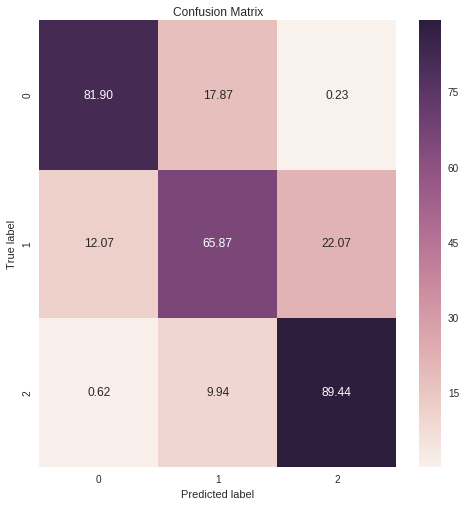

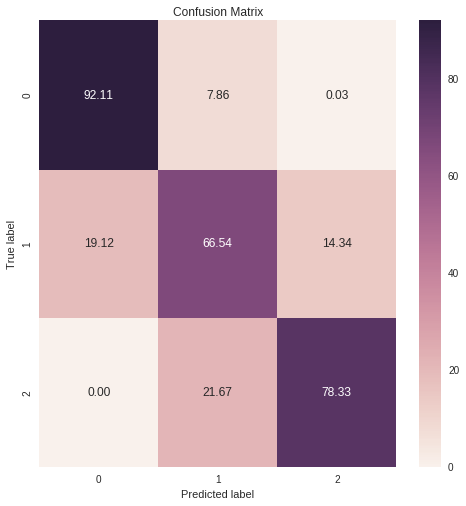

In [31]:
conf_matrix_train=gl.evaluation.confusion_matrix(train_data['label2'],model.predict(train_data))
conf_matrix_test=gl.evaluation.confusion_matrix(test_data['label2'],model.predict(test_data))
gl_confmatrix_2_confmatrix(conf_matrix_train)    
gl_confmatrix_2_confmatrix(conf_matrix_test)    

### 观察

通过观察系数，发现很多值都非常小

In [32]:
model.coefficients.sort('value').show()

Canvas is updated and available in a tab in the default browser.


#### 比较

比较`label 1`两种状态的相似之处。

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 's1', 'mean_s1', 'stdv_s1', 's5', 'mean_s5', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 19591

Number of classes           : 2

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 67

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.337316     | 0.919810          | 0.932692            |

| 2         | 3        | 0.574333     | 0.923128          | 0.935577            |

| 3         | 4        | 0.876691     | 0.923128          | 0.936538            |

| 4         | 5        | 1.166313     | 0.922669          | 0.938462            |

| 5         | 6        | 1.387477     | 0.922669          | 0.938462            |

| 6         | 7        | 1.617119     | 0.922669          | 0.938462            |

| 10        | 11       | 2.562360     | 0.922669          | 0.938462            |

+-----------+----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

array([[ 97.69664682,   2.30335318],
       [ 16.26506024,  83.73493976]])

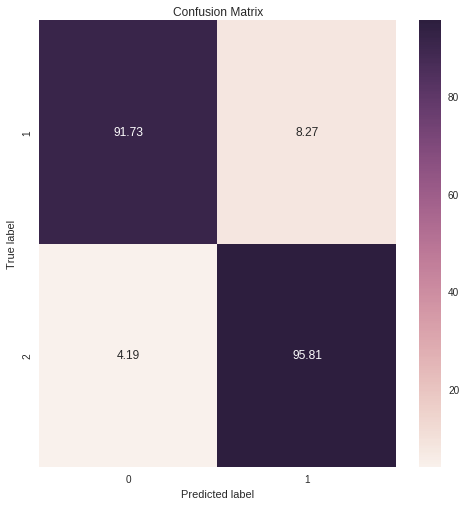

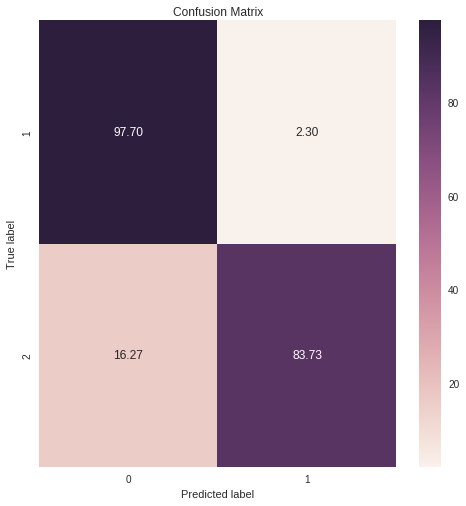

In [33]:
model=gl.logistic_classifier.create(train_data,'label1',features_to_train,class_weights='auto')
conf_matrix_train=gl.evaluation.confusion_matrix(train_data['label1'],model.predict(train_data))
conf_matrix_test=gl.evaluation.confusion_matrix(test_data['label1'],model.predict(test_data))
gl_confmatrix_2_confmatrix(conf_matrix_train,number_label=2)    
gl_confmatrix_2_confmatrix(conf_matrix_test,number_label=2)    

### 尝试

尝试使用不同类型的分类器。

##### 随机森林分类器

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 's1', 'mean_s1', 'stdv_s1', 's5', 'mean_s5', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Random forest classifier:

--------------------------------------------------------

Number of examples          : 19639

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.161979     | 0.903422          | 0.876449            | 0.408307          | 0.447034            |

| 2         | 0.305011     | 0.912128          | 0.884320            | 0.401344          | 0.440998            |

| 3         | 0.453793     | 0.912576          | 0.880171            | 0.398947          | 0.446824            |

| 4         | 0.614557     | 0.916955          | 0.870486            | 0.397834          | 0.446866            |

| 5         | 0.766201     | 0.915697          | 0.869579            | 0.396658          | 0.446266            |

| 6         | 0.921221     | 0.917981          | 0.856327            | 0.396047          | 0.444238            |

| 10        | 1.538454     | 0.918176          | 0.871223            | 0.395174          | 0.442071            |

| 11        | 1.691847     | 0.916468          | 0.866423            | 0.395026          | 0.444069            |

| 20        | 3.109550     | 0.916610          | 0.860801            | 0.393660          | 0.441565            |

| 30        | 4.656366     | 0.916573          | 0.860801            | 0.393028          | 0.441908            |

| 40        | 6.187449     | 0.916118          | 0.860801            | 0.392420          | 0.443994            |

| 50        | 7.689040     | 0.916827          | 0.861623            | 0.392606          | 0.444994            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

array([[ 97.03854591,   2.96145409,   0.        ],
       [ 11.39705882,  84.92647059,   3.67647059],
       [  0.        ,  50.        ,  50.        ]])

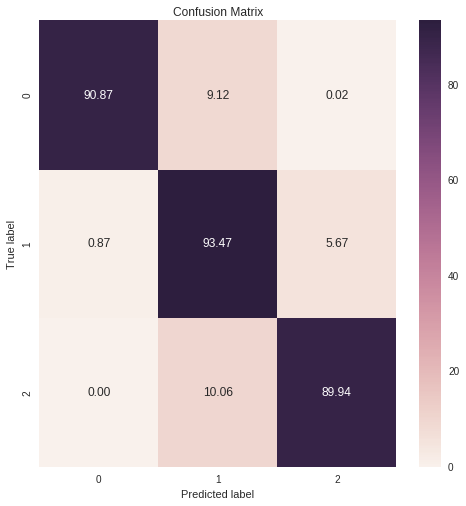

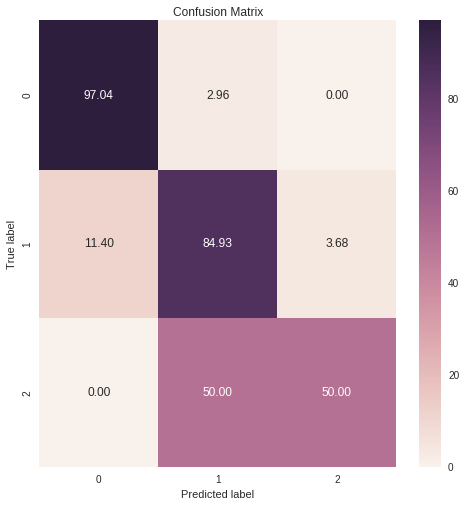

In [36]:
model=gl.random_forest_classifier.create(train_data,'label2',features_to_train,class_weights='auto',max_iterations=50)
conf_matrix_train=gl.evaluation.confusion_matrix(train_data['label2'],model.predict(train_data))
conf_matrix_test=gl.evaluation.confusion_matrix(test_data['label2'],model.predict(test_data))
gl_confmatrix_2_confmatrix(conf_matrix_train)    
gl_confmatrix_2_confmatrix(conf_matrix_test) 

##### 梯度提升树分类器

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 's1', 'mean_s1', 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19546

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.159776     | 0.910484          | 0.888433            | 0.802232          | 0.810857            |

| 2         | 0.332499     | 0.915560          | 0.906235            | 0.623962          | 0.636239            |

| 3         | 0.498188     | 0.920510          | 0.913711            | 0.504566          | 0.519283            |

| 4         | 0.653809     | 0.926458          | 0.923600            | 0.421611          | 0.437514            |

| 5         | 0.820599     | 0.929421          | 0.924746            | 0.360001          | 0.377570            |

| 6         | 0.992003     | 0.931454          | 0.925128            | 0.313592          | 0.331439            |

| 10        | 1.629315     | 0.947107          | 0.930836            | 0.207957          | 0.239405            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

array([[ 97.68881228,   2.31118772,   0.        ],
       [ 15.07352941,  81.25      ,   3.67647059],
       [  0.        ,  36.66666667,  63.33333333]])

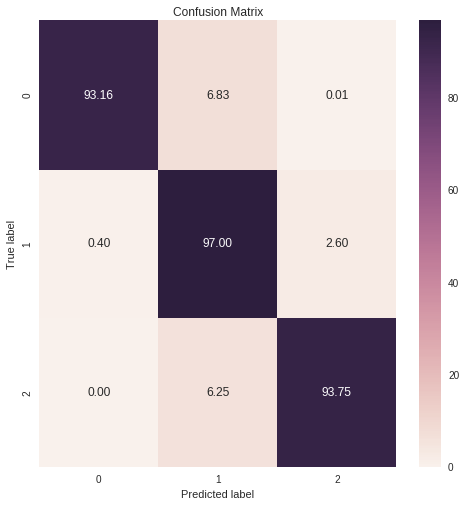

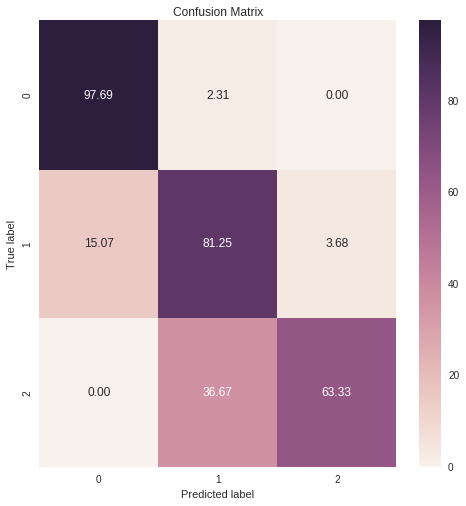

In [37]:
model=gl.boosted_trees_classifier.create(train_data,'label2',features_to_train,class_weights='auto')
conf_matrix_train=gl.evaluation.confusion_matrix(train_data['label2'],model.predict(train_data))
conf_matrix_test=gl.evaluation.confusion_matrix(test_data['label2'],model.predict(test_data))
gl_confmatrix_2_confmatrix(conf_matrix_train)    
gl_confmatrix_2_confmatrix(conf_matrix_test) 